In [ ]:
!pip install wikipedia matplotlib==3.0.3 seaborn -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 11.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires matplotlib>=3.5, but you have matplotlib 3.0.3 which is incompatible.
bigframes 1.17.0 requires matplotlib>=3.7.1, but you have matplotlib 3.0.3 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.0.3 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.0.3 which is incompatible.


# Вспоминаем, что было на прошлом семинаре:
1. Какие этапы работы с данными существуют?
2. Какие могут быть особенности в токенизации?
3. Какие бывают метрики?
4. Какой итоговый пайплайн для создания спеллчеккера?

# Семинар 2. Препроцессинг. Определение языка

In [ ]:
from collections import Counter
import wikipedia
import re

import nltk
nltk.download("punkt")

import random
random.seed(0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Данные
Независимо от способа определения языка, нам нужны данные. Для этого выкачаем для нужных нам языков страницы с Википедии.

In [ ]:
TEST_LANGS = ('es', 'it', 'kk', 'ru', 'uk', 'be')

In [ ]:
def get_texts_for_lang(lang, n=10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n+10)
    page_idx = 0
    while len(wiki_content) != n and len(pages) != n:
        try:
            page_name = pages[page_idx]
            page = wikipedia.page(page_name)
            wiki_content.append(f"{page.title}\n{page.content.replace('=', '')}")  # = используется в названиях глав
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
        page_idx += 1
    return wiki_content

In [ ]:
wiki_texts = {}
for lang in TEST_LANGS:
    wiki_texts[lang] = get_texts_for_lang(lang, 30)
    print(lang, len(wiki_texts[lang]))

es 30
it 30


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Славянка
kk 30
ru 30
Skip Мулон
Skip Токмаков
uk 30
Skip Гольцаў
Skip Дзявяткавічы
Skip Строй (значэнні)
Skip Харакова
be 30


## 2. Методы определения языка

### Идея 1. Определим по частотным словам.

Попробуем выделить частотные слова для каждого языка и по ним определять язык. Для начала давайте создадим счетчик с самыми частотными словами. Не забудьте:
- токенизировать любым удобным вам образом
- избавиться от цифр и прочего мусора
- вывод должен быть в виде словаря из ста самых частых слов

In [ ]:
def collect_freqlist(wiki_pages, max_len=100):
    """
    Функция токенизирует и чистит текст, после чего выводит топ-100 слов.
    :param wiki_pages (list): тексты
    :param max_len (int): количество наиболее частых слов
    :returns dict: словарь наиболее частых слов размера max_len
    """
    pass

In [ ]:
# collect_freqlist(wiki_texts['ru'])

__Вопросы:__
- почему не стоит брать совсем редкие слова? (встретились 2-3 раза)
- почему стоит параметр размера словаря - 100? Как можно определить оптимальный?
- в данном случае мы не выкидываем формы одного слова. Какие могут быть минусы и плюсы подобного подхода?

In [ ]:
freq_lists = {}
for lang in TEST_LANGS:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [ ]:
def simple_lang_detect(freq_lists, text):
    """
    Счётчик, который для каждого языка хранит информацию о том,
    сколько слов из входного текста являются словами этого языка
    :param freq_lists (dict): словарь топ-n слов для каждого языка
    :param text (str): текст, для которого нужно определить язык
    :returns: отсортированный список пар (язык, количество слов)
    """
    pass

In [ ]:
test_texts = get_texts_for_lang('it', n = 1)[0]
print(test_texts[:1000])

Corps of Colonial Marines
Il nome Corps of Colonial Marines fu usato per indicare due differenti unità di fanteria di marina britanniche reclutate tra ex schiavi neri nelle Americhe, agli ordini di Alexander Cochrane.
Le unità furono costituite in due posti diversi per due guerre diverse (Guerre napoleoniche, Guerra del 1812), e furono poi disciolte una volta che fu scomparsa la minaccia militare. A parte il fatto che in entrambi i casi il "creatore" fu Cochrane, non avevano nulla in comune.


 Primo corps 

Il primo Corps era una piccola unità attiva nei Caraibi dal 1808 al 12 ottobre 1810, reclutata tra ex schiavi per ovviare alla penuria di personale militare nella zona. I soldati arruolati sul posto erano meno soggetti alle malattie tropicali di quanto non fossero le truppe inviate dalla Gran Bretagna. Il Corps replicava il modello praticato dai West India Regiments nel reclutare ex schiavi come soldati. 
L'anno precedente, il Mutiny Act del 1807 aveva emancipato tutti gli schiavi 

In [ ]:
simple_lang_detect(freq_lists, test_texts)

[('it', 786), ('es', 270), ('kk', 58), ('uk', 21), ('ru', 0), ('be', 0)]

#### Accuracy нашего метода

Создадим отдельную тестовую выборку, на основе которой будем сравнивать работу методов.

In [ ]:
wiki_texts_test = {}
test_size = 10
for lang in TEST_LANGS:
    wiki_texts_test[lang] = get_texts_for_lang(lang, test_size)
    print(lang, len(wiki_texts_test[lang]))

es 10
Skip Bom Jesus do Tocantins (Tocantins)
it 10
kk 10
ru 10
Skip Любешинек
uk 10
Skip Даркевіч
Skip Прыстань
be 10


In [ ]:
from sklearn.metrics import accuracy_score

def test_simple_lang_detect(freq_lists, wiki_texts_test):
    results = []  # сюда будем писать результаты
    gold = []     # сюда будем писать исходный язык
    mistakes = []
    for lang in TEST_LANGS:
        lang_texts = wiki_texts_test[lang]
        for text in lang_texts:
            predicted_lang = simple_lang_detect(freq_lists, text)
            results.append(predicted_lang[0][0])
            gold.append(lang)

            if predicted_lang[0][0] != lang:
                mistakes.append([text.split('\n')[0], lang, predicted_lang])
    print("RESULTS:")
    print(f"{len(TEST_LANGS)} languages")
    print(f"Test size: {len(lang_texts)} texts per language")
    print(f"Accuracy: {accuracy_score(results, gold):.4f}")
    return mistakes

In [ ]:
# проверка
mistakes = test_simple_lang_detect(freq_lists, wiki_texts_test)

RESULTS:
6 languages
Test size: 10 texts per language
Accuracy: 0.9667


In [ ]:
mistakes

[['Формациялар кешені',
  'kk',
  [('es', 0), ('it', 0), ('kk', 0), ('ru', 0), ('uk', 0), ('be', 0)]],
 ['Андрэ Гоміш',
  'be',
  [('uk', 1), ('be', 1), ('es', 0), ('it', 0), ('kk', 0), ('ru', 0)]]]

__Как можно доработать этот подход?__

Считать не количество слов каждого языка, а некоторый коэффициент, основанный на частоте встречаемости слова в языке. Т.е. если слово встречается в этом языке часто, то выше вероятность, что текст написан на нём. (м.б. что-то похожее на tf-idf)

### Идея 2. Префиксы-суффиксы


Что если мы хотим учитывать морфологию при анализе? Тут сразу появляется проблема: пока мы не знаем, какой язык перед нами, мы не знаем, как в нём работает морфология.

In [ ]:
import nltk
ps = nltk.stem.PorterStemmer()
ps.stem('машины')

'машины'

Попробуем вариант "в лоб": соберём список частотных префиксов и суффиксов. Для этого возьмём все те же тексты, и для каждого слова будем сохранять все его преффиксы и суффиксы. Например, для слова *машина* мы сохраним следующий набор: *машина*, *машин*, *маши*, *маш*, *ма*, *м*, *ашина*, *шина*, *ина*, *на*, *а*

In [ ]:
def collect_pref_suff_freqlist(wiki_pages, max_len=200):
    freqlist = Counter()
    for text in wiki_pages:
        for word in nltk.word_tokenize(text):
            word = re.sub('\d', '', word)
            if word.isalpha():
                for i in range(len(word)+ 1):
                    if len(word[i:]) >= 1:
                        freqlist[word[i:]] += 1
                    if len(word[:i]) >= 1:
                        freqlist[word[:i]] += 1
    return dict(freqlist.most_common(max_len))

In [ ]:
# collect_pref_suff_freqlist(wiki_texts['ru'])

In [ ]:
freq_pref_suff_lists = {}
for lang in TEST_LANGS:
    freq_pref_suff_lists[lang] = collect_pref_suff_freqlist(wiki_texts[lang])

In [ ]:
def new_simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            word = re.sub('\d', '', word)
            for i in range(len(word)+ 1):
                if len(word[i:]) > 1:
                    counts[lang] += int(freq_list[word[i:]] > 0)
                if len(word[:i]) > 1:
                    counts[lang] += int(freq_list[word[:i]] > 0)
    return counts.most_common()

In [ ]:
simple_lang_detect(freq_pref_suff_lists, test_texts)

[('it', 743), ('es', 508), ('be', 99), ('ru', 95), ('kk', 82), ('uk', 67)]

In [ ]:
mistakes = test_simple_lang_detect(freq_pref_suff_lists, wiki_texts_test)

RESULTS:
6 languages
Test size: 10 texts per language
Accuracy: 0.9333


In [ ]:
mistakes

[['Сүр',
  'kk',
  [('ru', 13), ('kk', 10), ('uk', 4), ('be', 2), ('es', 0), ('it', 0)]],
 ['Геращенко, Анатолий Николаевич',
  'ru',
  [('uk', 25), ('ru', 24), ('be', 20), ('kk', 17), ('es', 1), ('it', 1)]],
 ['Зоряний склеп',
  'uk',
  [('be', 13), ('uk', 12), ('kk', 8), ('ru', 8), ('es', 0), ('it', 0)]],
 ['Андрэ Гоміш',
  'be',
  [('kk', 1), ('uk', 1), ('be', 1), ('es', 0), ('it', 0), ('ru', 0)]]]

### Идея 3. Машинное обучение

Будем говорить о **supervised** методах (обучение с учителем):

* У нас есть пары `(признаки, класс)`
* Классификатор обучается на них — подбирает подходящую функцию отображения признаков в множество классов
* После этого можно применять полученную модель для предсказаний на новых данных

Признаки могут быть разные:
* средняя/минимальная/максимальная длина слова
* векторизированные слова/символы/топ-n слов
* векторизированные предложения/тексты

Для определения языка часто используют не слова, а последовательности символов (символьные n-граммы / character ngrams). Например, 3-граммы:
```
сим, имв, мво, вол, оло, лов
```

Из обучающих данных соберем словарь символьных n-грамм $V$.
Тогда каждый текст сможем представить в виде вектора длины $|V|$, где каждый признак показывает, присутствует ли соответствующая n-грамма в тексте.

Будем использовать $tf \cdot idf$, чтобы учитывалась важность символов для строки:

$tf \cdot idf (n, d) = \frac{count(n_d)}{\sum_{w \in d}count(w)} \cdot log\frac{|D|}{|\{d \in D | n \in d\}|}$

где $n$ - n-грамма, $d$ - документ, а $D$ - весь корпус (на данном языке)

#### Векторизация

In [ ]:
from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])
# for item in vectorizer.get_feature_names_out()[:100]:
#    print(item)

TfidfVectorizer(analyzer='char', ngram_range=(1, 5))

In [ ]:
# print(vectorizer.transform(wiki_texts['ru'])[0])

#### Пайплайн обучения

In [ ]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

#%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

1. Строим пайплайн классификатора

In [ ]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB()) #параметр
])

2. Делаем обучающую и тестовую выборки

In [ ]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

test_texts = []
test_lang_indices = []
for lang in wiki_texts:
    test_texts.extend(wiki_texts_test[lang])
    test_lang_indices.extend([lang]*len(wiki_texts_test[lang]))

3. Обучаем классификатор

Так как мы сделали тестовую выборку, которой сравниваем результаты по разным методам, пусть будет три выборки: обучающая, валидационная и тестовая.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(
    all_texts,
    lang_indices,
    test_size=0.2,
    random_state=0
)
clf.fit(X_train, y_train)
y_val_predicted = clf.predict(X_val)
cm = metrics.confusion_matrix(y_val, y_val_predicted)

In [ ]:
print(y_predicted)
print(y_val)

['ru' 'es' 'uk' 'ru' 'it' 'kk' 'it' 'be' 'be' 'ru' 'it' 'be' 'be' 'es'
 'es' 'ru' 'be' 'uk' 'it' 'ru' 'uk' 'kk' 'kk' 'es' 'uk' 'be' 'ru' 'be'
 'be' 'kk' 'it' 'es' 'ru' 'uk' 'kk' 'es']
['ru', 'es', 'uk', 'be', 'uk', 'kk', 'it', 'be', 'be', 'ru', 'it', 'be', 'be', 'es', 'es', 'ru', 'be', 'uk', 'it', 'ru', 'uk', 'kk', 'kk', 'es', 'uk', 'be', 'ru', 'be', 'be', 'kk', 'it', 'es', 'ru', 'uk', 'kk', 'es']


In [ ]:
y_test_predicted = clf.predict(test_texts)
cm_test = metrics.confusion_matrix(test_lang_indices, y_test_predicted)

In [ ]:
# Нарисуем confusion matrix и оценим качество
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)

    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')

    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))

              precision    recall  f1-score   support

          be       1.00      0.90      0.95        10
          es       1.00      1.00      1.00        10
          it       0.91      1.00      0.95        10
          kk       1.00      1.00      1.00        10
          ru       1.00      1.00      1.00        10
          uk       1.00      1.00      1.00        10

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



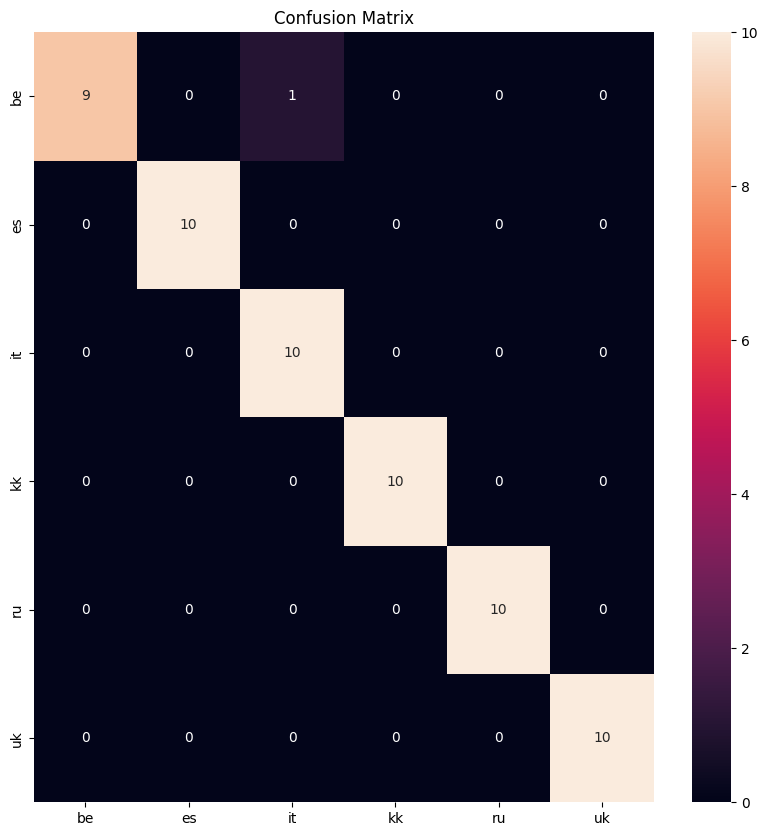

In [ ]:
test_classify(test_lang_indices, y_test_predicted, clf.classes_)

              precision    recall  f1-score   support

          be       1.00      0.89      0.94         9
          es       1.00      1.00      1.00         6
          it       0.80      1.00      0.89         4
          kk       1.00      1.00      1.00         5
          ru       0.86      1.00      0.92         6
          uk       1.00      0.83      0.91         6

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



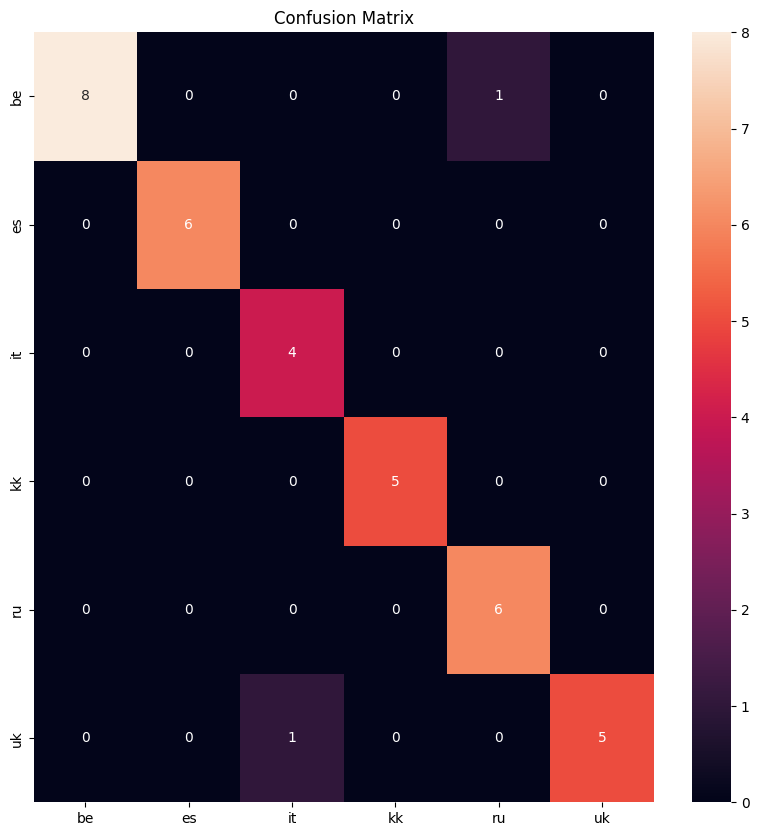

In [ ]:
test_classify(y_val, y_predicted, clf.classes_)

In [ ]:
# Проверим на случайных отрывках из тестовых текстов
import random

small_texts = []
for text in X_val:
    begin = random.randint(0, len(text) - 50)
    small_texts.append(text[begin:begin+50])
y_predicted_small = clf.predict(small_texts)
test_classify(y_val, y_predicted_small, clf.classes_)

## Задание

[Здесь](https://disk.yandex.ru/d/O0r3gHiUwTRmmg) лежит текст Анны Карениной на английском. Ваше задание -- взять текст и один из рассмотренных в ходе семинара методов определения языка и извлечь несколько предложений на французском из текста.